## Table of Contents

1. [Introduction](#intro)<br><br>
2. [Load and Check Data](#load_and_check_data)<br><br>
3. [Data Exploration and Preprocessing](#data_exp_pro)<br>- [3.1 Outliers](#outliers) <br>- [3.1.1 Outliers Detection](#outliers_detection)<br>- [3.1.2 Removal of Outliers](#r_outliers)<br>- [3.2 Target Variable](#target_variable)<br>- [3.2.1 Distribution](#t_distribution)<br>- [3.2.2 Transformation](#t_transformation)<br>- [3.3 Correlation Check](#correlation)<br>- [3.4 Pairplot](#pairplot)<br>- [3.5 Seperation](#seperation)<br>- [3.6 Concatenation of train and test datasets](#concat)<br><br>
4. [Feature Engineering](#feature_engineering)<br>- [4.1 Missing Values](#missing_values)<br>- [4.1.1 Check For Missing Values](#check_missing)<br>- [4.1.2 Imputing Missing Values](#imputing_missing)<br>- [4.2 Transformation & Encoding](#transformation_encoding)<br>- [4.2.1 Data Type & LabelEncoder](#data_type)<br>- [4.2.2 New Feature](#new_feature)<br>- [4.2.3 Skewed Numeric Features](#numeric_features)<br>- [4.2.4 Log1p Transformation](#log1p)<br>- [4.2.5 Dummy Variables](#dummy)<br>- [4.2.6 Train Test Split](split)
<br><br>5. [Modeling](#modeling)<br>- [5.1 Feature Scailing](#feature_scailing)<br>- [5.2 Simple Modeling](#simple_modeling)<br>- [5.3 Learning Curves](#learning_curves)<br>- [5.4 Stacked Regression and GridSearch](#stacked_regression_and_gridsearch)
<br><br>6. [Submission](#submission)<br><br>

## 1. Introduction
<a id='intro'></a>

## 2. Load and Check Data
<a id='load_and_check_data'></a>

In [1]:
# import libraries 

import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import scipy.stats as stats
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# let's start by reading the train and test dataset.

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
# print out the first five rows of the train datasets

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# print out the first five rows of the test datasets.

test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 3. Data Exploration & Preprocessing
<a id='data_exp_pro'></a>

### 3.1 Outliers
<a id='outliers'></a>

As [the data documentation](http://ww2.amstat.org/publications/jse/v19n3/Decock/DataDocumentation.txt) alluded, it is recommended removing any houses with more than 4000 square feet from the data set.

#### 3.1.1 Outliers Detection
<a id='outliers_detection'></a>

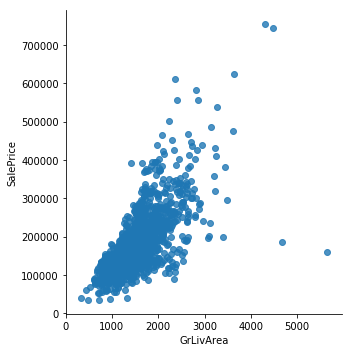

In [5]:
plt.figure()
otl = sns.lmplot('GrLivArea', 'SalePrice',data=train_df, fit_reg=False);

You can clearly see two outliers at the bottom right. Compared to the size of the house, they are extremely cheap.

In [6]:
#train_df[(train_df['SalePrice'] < 300000) & (train_df['GrLivArea'] > 4000)]
train_df[(train_df['GrLivArea'] > 4000)][['SalePrice','GrLivArea']]

,SalePrice,GrLivArea
523,184750,4676
691,755000,4316
1182,745000,4476
1298,160000,5642


#### 3.1.2 Removal of the Outliers
<a id='r_outliers'></a>

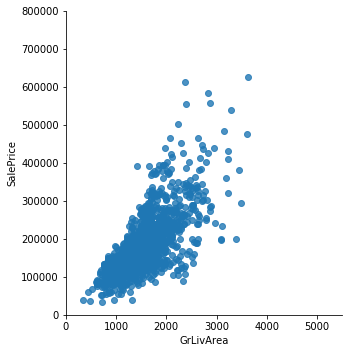

In [7]:
#train_df.drop(train_df[(train_df['SalePrice'] < 300000) & (train_df['GrLivArea'] > 4000)].index,inplace=True)
train_df.drop(train_df[(train_df['GrLivArea'] > 4000)].index,inplace=True)

plt.figure()
sns.lmplot('GrLivArea', 'SalePrice',data=train_df, fit_reg=False);
plt.xlim(0,5500);
plt.ylim(0,800000);

There could be many ways to handle outliers; however, I decide to follow the data docs author's recommendation (removing any houses with more than 4000 square feet from the data set). 

In [8]:
# check the dimensions
print(train_df.shape)

(1456, 81)


### 3.2 Target Variable
<a id='target_variable'></a>

#### 3.2.1 Distribution
<a id='t_distribution'></a>

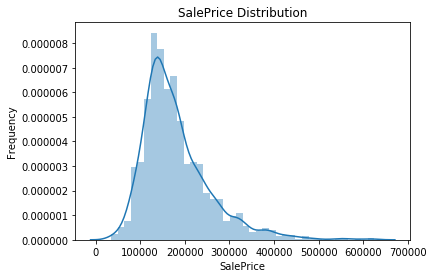

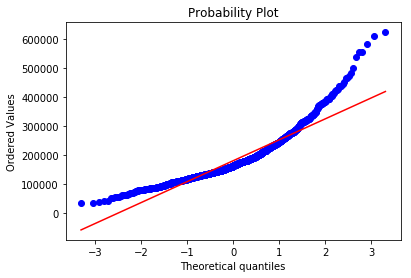

Skewness: 1.566


In [9]:
sns.distplot(train_df['SalePrice'])
plt.title('SalePrice Distribution')
plt.ylabel('Frequency')

plt.figure()
qq = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

# For normally distributed data, the skewness should be about zero. 
# A skenewss  value greater than zero means that there is more weight in the left tail of the distribution

print("Skewness: {:.3f}".format(train_df['SalePrice'].skew()))

As you can see the distribution plot and qq plot, the target variable is skewed to the right. In order to use many general linear models, we need to transform it to normal.

#### 3.2.2 Target Variable Transformation
<a id='t_transformation'></a>

In [10]:
# log1p calculates log(1 + input)

train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

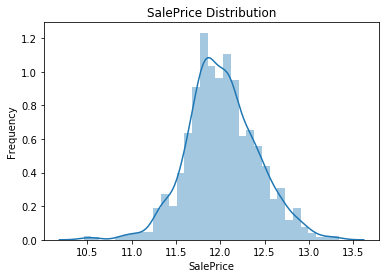

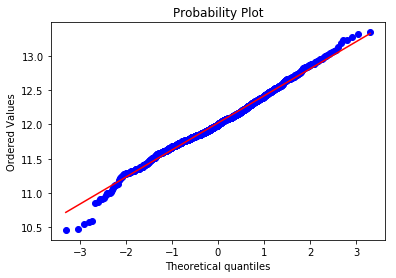

Skewness: 0.065


In [11]:
# let's check the result of the transformation

sns.distplot(train_df['SalePrice'])
plt.title('SalePrice Distribution')
plt.ylabel('Frequency')

plt.figure()
qq = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

print("Skewness: {:.3f}".format(train_df['SalePrice'].skew()))

By just taking log, the shape of the distribution becomes almost normal.  

### 3.3 Correlation Check
<a id='correlation'></a>

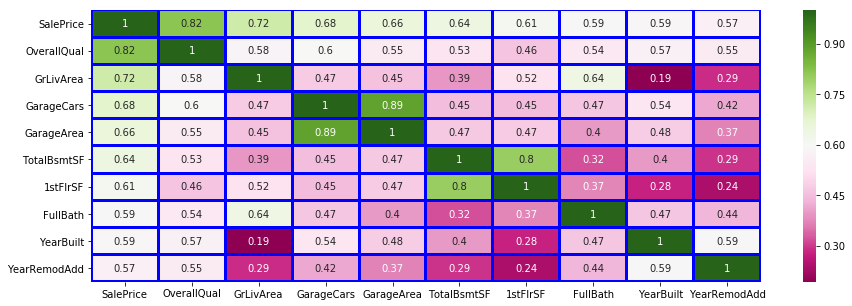

In [12]:
plt.figure(figsize=(15,5))

# correlation table
corr_train = train_df.corr()

# select top 10 highly correlated variables with SalePrice
num = 10
col = corr_train.nlargest(num, 'SalePrice')['SalePrice'].index
coeff = np.corrcoef(train_df[col].values.T)

# heatmap
heatmp = sns.heatmap(coeff, annot = True, xticklabels = col.values, yticklabels = col.values, linewidth=2,cmap='PiYG', linecolor='blue')

Based on the correlation table shown, we can conjecture that the features related with __quality__ (OverallQual,FullBath, YearBuilt, YearRemodAdd) and the __size__ (GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF) may play an important role in prediction.

### 3.4 Pairplot
<a id='pairplot'></a>

One of the best way to visualize the relationship between the target variable and many features at the same time is pairplot. In our case, instead of plotting the whole features with target variable, only chose the top 10 most highly correlated features with target variable: 'SalesPrice','OverallQual',GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 1stFlrSF', 'FullBath','YearBuilt', 'YearRemodAdd'.

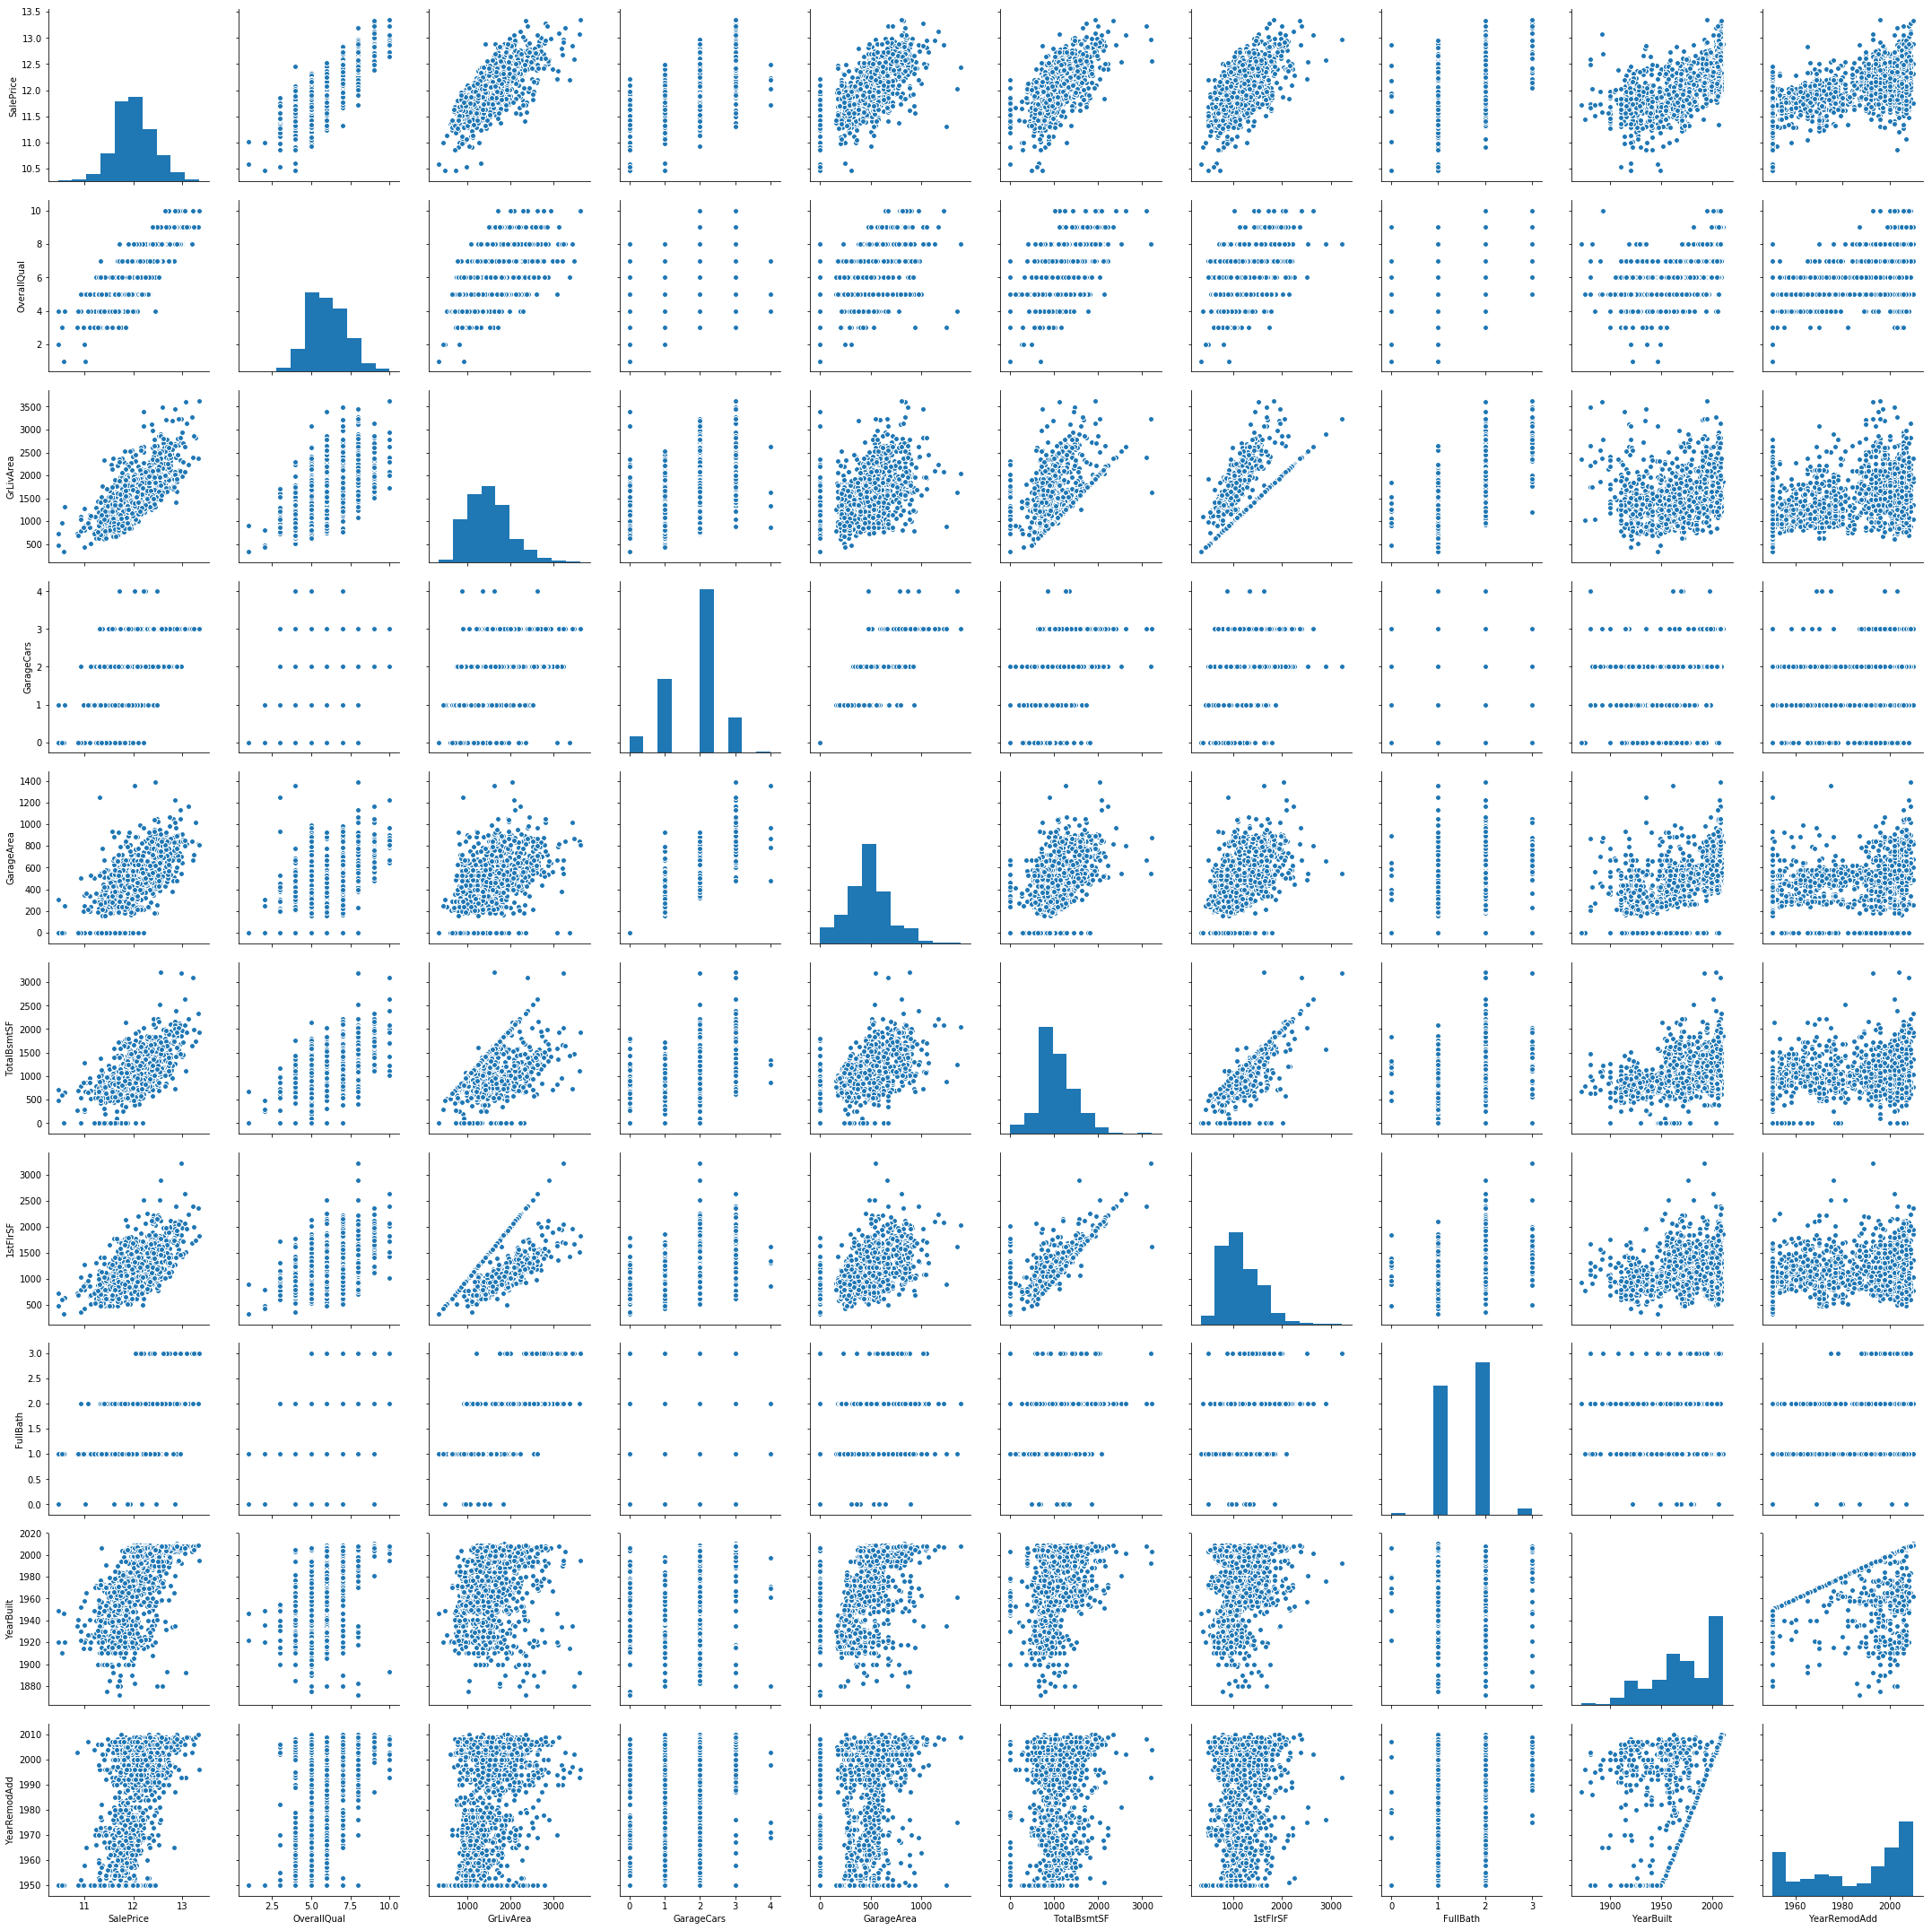

In [13]:
# Visualized the relationship between the target variable and top 10 features highly correlated with the target variable.

sns.pairplot(train_df[col], size=3);

As we can see the first column of the plots, it is not perfectly linear but we can say some of them are showing some positive linear pattern.

### 3.5 Independent Variables (Id, SalePrice) Seperation
<a id='seperation'></a>

In [14]:
# seperate id from datasets and drop them.

train_id = train_df.iloc[:,0]
test_id = test_df.iloc[:,0]

train_df.drop('Id',axis=1,inplace = True)
test_df.drop('Id',axis=1,inplace = True)

In [15]:
# seperate the target variable (SalePrice) from the train

y_df = train_df['SalePrice']
train_df.drop('SalePrice',axis=1,inplace=True)

print('dimension of the train:' , train_df.shape)
print('dimension of the test:' , test_df.shape)

dimension of the train: (1456, 79)
dimension of the test: (1459, 79)


### 3.6 Concatenation of train and test datasets
<a id='concat'></a>

In [16]:
# In order to avoid repeating unnecessary codes, for our convenience, let's combine the train and test set.
df = pd.concat([train_df, test_df]).reset_index()

df.drop(['index'],axis=1,inplace=True)

In [17]:
print('dimension of the dataset:' , df.shape)
df.head()

dimension of the dataset: (2915, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## 4. Feature Engineering
<a id='feature_engineering'></a>

### 4.1 Missing Values
<a id='missing_values'></a>

Handling missing data is important as many machine learning algorithms do not support data with missing values.

#### 4.1.1 Check For Missing Values
<a id='check_missing'></a>


In [18]:
mc = pd.DataFrame(df.isnull().sum(),columns=['Missing Count'])
mc = mc[mc['Missing Count']!=0]
mc['Missing %'] = (mc['Missing Count'] / df.shape[0]) * 100
mc.sort_values('Missing %',ascending=False)

,Missing Count,Missing %
PoolQC,2907,99.725557
MiscFeature,2810,96.397942
Alley,2717,93.207547
Fence,2345,80.445969
FireplaceQu,1420,48.713551
LotFrontage,486,16.672384
GarageFinish,159,5.454545
GarageQual,159,5.454545
GarageCond,159,5.454545
GarageYrBlt,159,5.454545


#### 4.1.2 Imputing Missing Values
<a id='imputing_missing'></a>

#### None

In [19]:
nones = ['PoolQC', 'MiscFeature', 'Alley','Fence', 'FireplaceQu', 'GarageType','GarageFinish',
        'GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'MasVnrType']

for none in nones:
    df[none].fillna('None',inplace = True)
    

The data documentation says missing values in the above features (the elements in the list "nones") mean these properties do not have one of them: garage, basment, fireplace, alley access, pool, misc features, fence, or masonry veneer. 

#### Zero

In [20]:
zeros = ['GarageYrBlt','GarageArea','GarageCars','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
         'BsmtFullBath','BsmtHalfBath','MasVnrArea']

for zero in zeros:
    df[zero].fillna(0, inplace = True)


Some features are explicitly described that the missing values mean zero or we can assume that these properties have zero basement or garage or masonry veneer.

#### Removal

In [21]:
Counter(df.Utilities)

Counter({'AllPub': 2912, 'NoSeWa': 1, nan: 2})

As you can see the above, there are only two categories in the Utilities feature: 'AllPub' and 'NoSeWa'. Moreover, except 1 'NoSeWa and 2 NaN values, all the values are 'AllPub' ,which means the data is very imbalanced and this feature seems not that helpful in predictive modeling. I decide to remove this feature.

In [22]:
df.drop('Utilities',axis=1, inplace=True)

#### Mode

Unlike Utilities feature, the features below are not extremly imbalanced and consist of many categories. Also, there are only a few missing values in each feature. Therefore, we can fill missing values with most frequently occurred values.

In [23]:
freq = ['MSZoning','Exterior1st','Exterior2nd','SaleType','Electrical','KitchenQual','Functional']

for fr in freq:
    df[fr].fillna(df[fr].mode()[0], inplace=True)

#### Groupby

Since there are a lot of missing values in the LotFrontage, simply filling in missing values with median or mode may affect badly our models. We can fill missing values in LotFrontage with the median LotFrontage of similar rows according to LotArea and Neighborhood.

In [24]:
df['old_lotfrontage'] = df['LotFrontage']

df['LotFrontage'] = df.groupby(['LotArea','Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

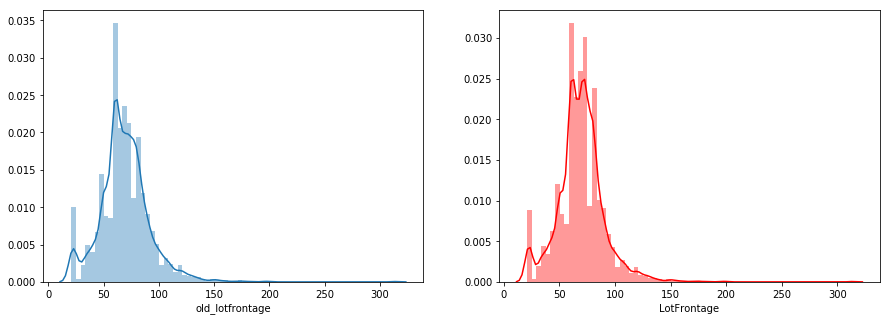

In [25]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ol = sns.distplot(df['old_lotfrontage'].dropna(),ax=ax1,kde=True,bins=70)
lf = sns.distplot(df['LotFrontage'],ax=ax2,kde=True,bins=70,color='red')

# drop the old_lotfrontage as we finished the comparison
df.drop('old_lotfrontage',axis=1,inplace=True)

The left blue plot is the distribution of the 'LotFrontage' from original dataset after simply omitting missing values and the right red plot is the distribution of the 'LotFrontage' after filling missing values with the median ages of similar rows. As you can see, the distributions are very similar each other.

In [26]:
print("Remaining missing values:",df.isnull().sum().sum())

Remaining missing values: 0


### 4.2 Transformation & Encoding
<a id='transformation_encoding'></a>

#### 4.2.1 Data Type & LabelEncoder
<a id='data_type'></a>

#### Nominal

Machine learning algorithms will require that nominal variables be converted into dummy variables (0 or 1) as all of scales are mutually exclusive (no overlap) and none of them have any numerical significance.

In [27]:
# get_dummies can convert data to 0 and 1 only if the data type is string. Among the many nominal features,
# MSSubClass, MoSold, and YrSold are integer type so we need to convert them to string type.

df['MoSold'] = df.astype(str)
df['YrSold'] = df.astype(str)
df['MSSubClass'] = df.astype(str)

nominals = ['MSSubClass','MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
           'Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','GarageType','MiscFeature','SaleType','SaleCondition','MoSold','YrSold']

#### Ordinal

With ordinal scales, it is the order of the values is what's important and significant, but the differences between each one is not really known. Therefore, unlike nominal, ordinal values matter the order (e.g. a > b > c). In this case, instead of using get_dummies (0 or 1), it is better to use LabelEncoder.

In [28]:
from sklearn.preprocessing import LabelEncoder

ordinals = ['LotShape','LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual',
           'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual',
            'Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']

for ordinal in ordinals:
    le = LabelEncoder()
    le.fit(df[ordinal])
    df[ordinal] = le.transform(df[ordinal])

#### 4.2.2 New Feature
<a id='new_feature'></a>

As we have seen the correlation table, area features such as GrLivArea or BsmtSF are highly correlated with house sales price. Creating new feature regarding the total area may help predict the target variable.

In [29]:
# Total square feet of houses

df['totalArea'] = df['GrLivArea'] + df['TotalBsmtSF']

#### 4.2.3 Skewed Numeric Features
<a id='numeric_features'></a>

In [30]:
# Assign numeric features by excluding non numeric features
numeric = df.dtypes[df.dtypes != 'object'].index

# Display the skewness of each column and sort the values in descending order 
skewness = df[numeric].apply(lambda x: x.skew()).sort_values(ascending=False)

# Create a dataframe and show 5 most skewed features 
sk_df = pd.DataFrame(skewness,columns=['skewness'])
sk_df['skw'] = abs(sk_df)
sk_df.sort_values('skw',ascending=False).drop('skw',axis=1).head()

,skewness
PoolQC,-22.996032
MiscVal,21.943440
PoolArea,18.711459
LotArea,13.130516
LowQualFinSF,12.086535


- Skewnewss quantifies how symmetrical the distribution is.
- If skewness is less than -1 or greater than 1, the distribution is highly skewed.
- If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
- If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

Source: https://help.gooddata.com/display/doc/Normality+Testing+-+Skewness+and+Kurtosis

#### 4.2.4 Log1p Transformation
<a id='log1p'></a>

In [31]:
# As a general rule of thumb, skewness with an absolute value less than 0.5 is considered as a acceptable range of skewness for normal distribution of data
skw_feature = skewness[abs(skewness) > 0.5].index

# Transform skewed features to normal distribution by taking log(1 + input)
df[skw_feature] = np.log1p(df[skw_feature])


Even though I consider the features with more than 0.5 skewness as not normally distributed feature, you can try some different numbers to improve the result since there is no clear cut rule for the cutoff value.  

#### 4.2.5 Dummy Variable
<a id='dummy'></a>

A dummy variable is one that takes the value 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome. Since 'get_dummies' function does not affect numerical values, only nominal data type values will be converted to 0 or 1 (as we already converted ordinal types values to numeric by LabelEncoder, we do not have to worry about that). 

In [32]:
df = pd.get_dummies(df)
print(df.shape)

(2915, 265)


#### 4.2.6 Train Test Split
<a id='split'></a>

Since data cleaning and feature engineering process are finished, we need to split the combined dataset into train and test as given dataset

In [33]:
# Split the combined dataset into two: train and test

X_train = df[:train_df.shape[0]]
X_test = df[train_df.shape[0]:]

#X_train, X_test, y_train, y_test = train_test_split(df,y_df, random_state = 1)


In [34]:
print("training shape:{}, test shape:{}".format(X_train.shape,X_test.shape))

training shape:(1456, 265), test shape:(1459, 265)


## 5. Modeling
<a id='modeling'></a>

In [35]:
# Import libraries

from sklearn.model_selection import GridSearchCV,learning_curve, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

from sklearn.linear_model import LassoCV,ElasticNetCV,Lasso,ElasticNet
from sklearn.kernel_ridge import KernelRidge

from mlxtend.regressor import StackingRegressor
from xgboost import XGBRegressor

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
print(X_train.shape, X_test.shape,y_df.shape)


(1456, 265) (1459, 265) (1456,)


### 5.1 Feature Scaling
<a id = 'feature_scailing'></a>

Many machine learning algorithms expect the scale of the input and even the output data to be equivalent. It can help in methods, particularly linear models, that weights in order to make a prediction.

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
#X_train = RobustScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = df.columns )

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = df.columns)
#X_test = RobustScaler().fit_transform(X_test)

In [38]:
y_df.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

### 5.2 Simple Modeling
<a id = 'simple_modeling'></a>

We will be evaluating below algorithms' root-mean-squared-error for train dataset. 

> - Ridge Regression
> - Lasso Regression
> - ElasticNet Regression
> - Support Vector Machine
> - Random Forest
> - XG Boost

#### Kfold

In [39]:
kfold = KFold(n_splits=20, random_state= 0, shuffle = True)

#### Score

In [40]:
def rmsle_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_df, scoring="neg_mean_squared_error", cv = kfold))
    return(rmse)


#### Kernel Ridge

In [41]:
KR = KernelRidge()

KR_param_grid = {
    'alpha' : [0.93],
    'kernel' : ['polynomial'],
    'gamma':[0.001],
    'degree': [3],
    'coef0': [1.5]
}

KR_CV = GridSearchCV(KR, param_grid = KR_param_grid, cv = kfold, scoring = "neg_mean_squared_error",n_jobs = -1, verbose = 1)
KR_CV.fit(X_train, y_df)
KR_best = KR_CV.best_estimator_
print(KR_best)

# scaler, cv = 20
# * KernelRidge(alpha=1.0, coef0=0.9, degree=2, gamma=0.004, kernel='polynomial',kernel_params=None)
# ** KernelRidge(alpha=0.93, coef0=1.5, degree=3, gamma=0.001, kernel='polynomial',kernel_params=None)
# *** KernelRidge(alpha=0.93, coef0=1.5, degree=3, gamma=0.001, kernel='polynomial',kernel_params=None) - 0.12514


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   15.0s finished


KernelRidge(alpha=0.93, coef0=1.5, degree=3, gamma=0.001, kernel='polynomial',
      kernel_params=None)


In [42]:
y_submission_1 = np.expm1(KR_best.predict(X_test))

In [43]:
score = rmsle_cv(KR_best)
print("Kernel Ridge mean score:", score.mean())
print("Kernel Ridge std:", score.std())

Kernel Ridge mean score: 0.112237792006
Kernel Ridge std: 0.0195056284164


#### Lasso Regression

In [45]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0005, 0.0008, 0.001, 0.003, 0.007, 0.009, 0.01, 0.03, 0.05, 0.07, 0.09, 0.2, 0.4, 0.6, 0.8, 1, 1.2], random_state = 1, n_jobs = -1, verbose = 1)
lasso.fit(X_train, y_df)
alpha = lasso.alpha_
print("Optimized Alpha:", alpha)

lasso = LassoCV(alphas = alpha * np.linspace(0.5,1.5,20), cv = kfold, random_state = 1, n_jobs = -1, verbose = 1)
lasso.fit(X_train, y_df)
alpha = lasso.alpha_
print("Final Alpha:", alpha)

# scaler cv = 20
#lasso = LassoCV(alphas = 0.00244736842105, cv = kfold, random_state = 1, n_jobs = -1, verbose = 1)
#lasso.fit(X_train, y_df)
print("Lasso Score:", rmsle_cv(lasso).mean())

#Final Alpha: 0.00244736842105

.........................................................[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished


Optimized Alpha: 0.003


................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.7s finished


Final Alpha: 0.00244736842105


................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.7s finished
................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.8s finished
..........................................................

................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.7s finished
................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.7s finished
..........................................................

Lasso Score: 0.111510667972


In [46]:
y_submission_2 = np.expm1(lasso.predict(X_test))

#### ElasticNet Regression

In [47]:
elnet = ElasticNetCV(alphas = [0.0001, 0.0003, 0.0005, 0.0008, 0.001, 0.003, 0.007, 0.009, 0.01, 0.03, 0.05, 0.07, 0.09, 0.2, 0.4, 0.6, 0.8, 1, 1.2] 
                ,l1_ratio = [0.1, 0.3, 0.5, 0.7, 0.9, 1]
                ,cv = kfold, random_state = 1, n_jobs = -1, verbose = 1)
elnet.fit(X_train, y_df)
alpha = elnet.alpha_
ratio = elnet.l1_ratio_
print("Optimized Alpha:", alpha)
print("Optimized l1_ratio:", ratio)

elnet = ElasticNetCV(alphas = alpha * np.linspace(0.5,1.5,20), l1_ratio = ratio * np.linspace(0.9,1.3,6), 
                     cv = kfold, random_state = 1, n_jobs = -1, verbose = 1)
elnet.fit(X_train, y_df)

alpha = elnet.alpha_
ratio = elnet.l1_ratio_

print("Final Alpha:", alpha)
print("Final l1_ratio:", ratio)
print("ElasticNet Score:", rmsle_cv(elnet).mean())


# scaler cv = 20
#elnet = ElasticNetCV(alphas = 0.0276315789474, l1_ratio= 0.09, cv = kfold, random_state = 1, n_jobs = -1, verbose = 1 )
#elnet.fit(X_train, y_df)
#print("ElasticNet Score:", rmsle_cv(elnet).mean())

# Final Alpha: 0.0276315789474, Final l1_ratio: 0.09

.........................................................................C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
.......................................................................................................................................................................................................................................................................................C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
................................................................................................

Optimized Alpha: 0.03
Optimized l1_ratio: 0.1


.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
.........................................................................................

Final Alpha: 0.0276315789474
Final l1_ratio: 0.09


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.3s
..................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
..................................................................................................

..........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.8s
................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
..................................................................................................

..........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
..................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
..................................................................................................

ElasticNet Score: 0.111123289502


In [48]:
y_submission_3 = np.expm1(elnet.predict(X_test))
# kaggle_score: 0.12302

#### Support Vector Machine

In [ ]:

epsilons = [0.03]
degrees = [2]
coef0s = [1.6]

gammas = ['auto']
Cs = [0.1]
kernels = ['poly']

param_grid = dict(C=Cs, epsilon = epsilons, gamma=gammas, kernel=kernels, degree= degrees, coef0=coef0s)
SVMR = GridSearchCV(SVR(), param_grid = param_grid, cv = kfold, scoring = "neg_mean_squared_error",n_jobs = -1,verbose = 1)

SVMR.fit(X_train,y_df)
SVMR_best = SVMR.best_estimator_
print(SVMR.best_params_)

# cv = 20 

# * {'kernel': 'poly', 'C': 0.1, 'gamma': 'auto', 'degree': 2, 'epsilon': 0.03, 'coef0': 1.5} - 0.12514
# ** {'kernel': 'poly', 'C': 0.1, 'gamma': 'auto', 'degree': 2, 'epsilon': 0.03, 'coef0': 1.6} - 0.12428

In [ ]:
# 위에서 나온 수치에다가 곱샘으로 한번더 gridsearch


In [ ]:
y_submission_4 = np.expm1(SVMR.predict(X_test))

#### Random Forest

In [ ]:
RFC = RandomForestRegressor(random_state = 1)

rf_param_grid = {"max_depth": [None,20,30,35,45,50],
              "max_features": [80,82,84,85,86,87,88,89,90],
              "min_samples_leaf": [1,2,3],
              "n_estimators" :[550,560,570,580,590]
                }

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv = kfold, scoring = "neg_mean_squared_error", n_jobs = -1, verbose = 1)
gsRFC.fit(X_train,y_df)
RFC_best = gsRFC.best_estimator_
print(gsRFC.best_params_)


# cv = 20 (Scaler)
# {'max_depth': None, 'min_samples_leaf': 1, 'max_features': 88, 'n_estimators': 600}
# {'max_depth': None, 'min_samples_leaf': 1, 'max_features': 88, 'n_estimators': 570} - 0.13778

In [ ]:
# 위에서 나온 수치에다가 곱샘으로 한번더 gridsearch

In [ ]:
y_submission_5 = np.expm1(gsRFC.predict(X_test))

#### XG Boost

In [49]:
XGB = XGBRegressor()

xg_param_grid = {
              'n_estimators' :[870],
              'learning_rate': [0.04],
              
              'max_depth': [3],
              'min_child_weight':[0.2],
              
              'gamma': [0],
                
              'subsample':[0.8],
              'colsample_bytree':[0.7]
    
              #'reg_alpha':[0.08,0.09,0.095,0.1,0.15,0.2],
              #'reg_lambda':[0,0.001,0.002]
              }
                
gsXGB = GridSearchCV(XGB,param_grid = xg_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= -1, verbose = 1)
gsXGB.fit(X_train,y_df)
XGB_best = gsXGB.best_estimator_
print(gsXGB.best_params_)

# cv = 20
# {'min_child_weight': 0.5, 'learning_rate': 0.05, 'n_estimators': 850, 'max_depth': 3} - 0.12611
# {'min_child_weight': 0.2, 'learning_rate': 0.04, 'gamma': 0, 'n_estimators': 870, 'max_depth': 3}
# * {'max_depth': 3, 'subsample': 0.8, 'learning_rate': 0.04, 'gamma': 0, 'colsample_bytree': 0.7, 'min_child_weight': 0.2, 'n_estimators': 870} - 0.12287
# {'gamma': 0, 'min_child_weight': 0.1, 'learning_rate': 0.04, 'n_estimators': 885, 'max_depth': 3}

# {'reg_alpha': 0.1, 'reg_lambda': 0.001, 'n_estimators': 870, 'colsample_bytree': 0.7, 'subsample': 0.8, 'min_child_weight': 0.2, 'learning_rate': 0.04, 'gamma': 0, 'max_depth': 3} - 0.12531
# 

Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.6min finished


{'max_depth': 3, 'learning_rate': 0.04, 'subsample': 0.8, 'n_estimators': 870, 'colsample_bytree': 0.7, 'gamma': 0, 'min_child_weight': 0.2}


In [50]:
y_submission_6 = np.expm1(gsXGB.predict(X_test))

### 5.3 Learning Curves
<a id = 'learning_curves'></a>

A learning curve compares the performace of a model on training and testing data over a varying number of training instances. By plotting learning curves for each model, we can diagnose whether models are overfitted or underfitted

In [91]:
def lcplot(model, X, y, title, train_sizes = np.linspace(0.1,1,0.5)):
    train_sizes, train_scores, test_scores = learning_curve(model,X, y, cv=kfold, n_jobs = -1, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Training Size")
    plt.ylabel("Score")
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = 'b')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = 'r')
   
    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'b', label='Training Scores')
    plt.plot(train_sizes, test_scores_mean, 'o-', color = 'r', label = 'CV Scores')
    plt.legend(loc='best')
    
    return plt

#g = lcplot(Lasso(random_state = 1,alpha=alpha), X_train, y_df,'Lasso' )
#g = lcplot(elnet , X_train, y_df,'Elastic Net' )
g = lcplot(gsXGB , X_train, y_df,'XGBoost' )
g = lcplot(SVMR , X_train, y_df,'SVM' )
#g = lcplot( , X_train, y_df, )


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


ValueError: zero-size array to reduction operation minimum which has no identity

### 5.4 Stacked Regression and GridSearch
<a id = 'stacked_regression_and_gridsearch'></a>

Stacking is an ensemble learning technique to combine multiple regression models via a meta-regressor. In our case, we will use XG Boost as a meta-regressor. 

In [ ]:
print("source: https://rasbt.github.io/mlxtend/user_guide/regressor/StackingCVRegressor/")
Image(filename='mlxtend.stacking.png')

In [63]:
# 

XGB = XGBRegressor()

ELNET = ElasticNet(random_state = 1)
LCV=Lasso(random_state = 1)
SV = SVR()
KR = KernelRidge()
XG = XGBRegressor()
stack = StackingRegressor(regressors = [ELNET,LCV,XG],meta_regressor = XGB)

params = {
              
              'meta-xgbregressor__n_estimators' : [740*2],#740
              'meta-xgbregressor__learning_rate': [0.01/2], #0.01
              'meta-xgbregressor__min_child_weight':[0],
              'meta-xgbregressor__gamma':[0.1],
              'meta-xgbregressor__max_depth': [2],
              'meta-xgbregressor__subsample':[0.65],
              'meta-xgbregressor__colsample_bytree':[0.4],
              'meta-xgbregressor__reg_alpha':[0],
              'meta-xgbregressor__reg_lambda':[1],
              
              'lasso__alpha':[0.00244736842105],
              'elasticnet__alpha':[0.0276315789474],
              'elasticnet__l1_ratio':[0.09],
              'xgbregressor__min_child_weight':[0.2],
              'xgbregressor__n_estimators' : [870],
              'xgbregressor__learning_rate': [0.04],
              'xgbregressor__gamma':[0],
              'xgbregressor__max_depth': [3],
              'xgbregressor__subsample':[0.8],
              'xgbregressor__colsample_bytree':[0.7]
    
              #'kernelridge__alpha':[0.93],
              #'kernelridge__coef0':[1.5],
              #'kernelridge__degree':[3],
              #'kernelridge__gamma':[0.001],
              #'kernelridge__kernel':['polynomial'],
              #'kernelridge__kernel_params':[None],
              
              #'svr__coef0':[1.6],
              #'svr__kernel':['poly'],
              #'svr__epsilon':[0.03],
              #'svr__gamma': ['auto'],
              #'svr__degree': [2],
              #'svr__C':[0.1]
        }

grid = GridSearchCV(estimator = stack, param_grid=params,cv=kfold,refit=True, verbose=1,n_jobs=-1,scoring="neg_mean_squared_error")
grid.fit(X_train, y_df)
grid_best = grid.best_estimator_
print(grid_best)


#StackingRegressor(meta_regressor=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
#learning_rate=0.01, max_delta_step=0, max_depth=3,
#min_child_weight=0.5, missing=None, n_estimators=770, nthread=-1,
#objective='reg:linear', reg_alpha=0, reg_lambda=1,
#scale_pos_weight=1, seed=0, silent=True, subsample=1), - 0.12965

#**
# StackingRegressor(meta_regressor=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
# gamma=0, learning_rate=0.02, max_delta_step=0, max_depth=1,
# min_child_weight=0.3, missing=None, n_estimators=760, nthread=-1,
# objective='reg:linear', reg_alpha=0, reg_lambda=1,
# scale_pos_weight=1, seed=0, silent=True, subsample=0.3), - 0.12546

#***
#StackingRegressor(meta_regressor=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
#gamma=0, learning_rate=0.02, max_delta_step=0, max_depth=1,
#min_child_weight=0.2, missing=None, n_estimators=760, nthread=-1,
#objective='reg:linear', reg_alpha=0, reg_lambda=1,
#scale_pos_weight=1, seed=0, silent=True, subsample=0.2) - 0.12493

#StackingRegressor(meta_regressor=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.4,
#gamma=0.1, learning_rate=0.01, max_delta_step=0, max_depth=2,
#min_child_weight=0, missing=None, n_estimators=740, nthread=-1,
#objective='reg:linear', reg_alpha=0, reg_lambda=1,
#scale_pos_weight=1, seed=0, silent=True, subsample=0.65), - 0.12027

#StackingRegressor(meta_regressor=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.4,
#gamma=0.1, learning_rate=0.005, max_delta_step=0, max_depth=2,
#min_child_weight=0, missing=None, n_estimators=1480, nthread=-1,
#objective='reg:linear', reg_alpha=0, reg_lambda=1,
#scale_pos_weight=1, seed=0, silent=True, subsample=0.65) - 0.12026

Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.9min finished


StackingRegressor(meta_regressor=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.4,
       gamma=0.1, learning_rate=0.0033333333333333335, max_delta_step=0,
       max_depth=2, min_child_weight=0, missing=None, n_estimators=2220,
       nthread=-1, objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.65),
         regressors=[ElasticNet(alpha=0.0276315789474, copy_X=True, fit_intercept=True,
      l1_ratio=0.09, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=1, selection='cyclic', tol=0.0001,
      warm_start=False), Lasso(alpha=0.00244736842105, copy_X=True, fit_intercep...:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)],
         verbose=0)


In [64]:
y_submission_st = np.expm1(grid.predict(X_test))

In [57]:
y_submission_avg = (y_submission_6 + y_submission_2 + y_submission_st)/3

# W: 0.11960 (y_submission_6 + y_submission_2)/2
# WW: 0.11948 (y_submission_6 + y_submission_2 + y_submission_st)/3


In [82]:
#y_submission_weight = (y_submission_st *0.3340) + (y_submission_2 * 0.3331) + (y_submission_6 *0.3329)
# y_submission_weight = (y_submission_st *0.334) + (y_submission_2 * 0.3331) + (y_submission_6 *0.3329)
# Try the above one !!

# 0.34, 0.33, 0.33 - 11.952
#0.3340, 0.3331, 0.3329 - 11.952

## 6. Submission
<a id='submission'></a>

In [83]:
my_submission = pd.DataFrame()
my_submission['Id'] = test_id
my_submission['SalePrice'] = y_submission_weight
my_submission.to_csv('submission47.csv',index=False)  

#best score so far: submission07

In [75]:
35+33+22

90